# FeatureExtraction

In [4]:
from scipy.stats import skew
import os
import csv
import pandas as pd
from tqdm import tqdm

In [5]:
def extractFeatures(data):
	mean = data.mean()
	rmax = data.max()
	rmin = data.min()
	variance = data.var()
	std = data.std()
	skew1  = skew(data)
	features = [mean, rmax, rmin, variance, std, skew1]
	return features

def makeFeatureHeader(features, colNames):
	header = []
	for col in colNames:
		for feature in features:
			header.append(col + "_" + feature)
	header.append("activity")
	return header

In [6]:
features = ["mean", "max", "min", "var", "std", "skew"]
activites = {'a01': 'sitting', 'a02': 'standing', 'a03': 'lyingBack','a04':'lyingRigh','a05':'ascendingStairs','a06':'decendingStairs', 'a07':'standingInElevatorStill','a08':'movingInElevator','a09':'walkingLot','a10':'walkingTreadmillFlat', 'a11':'walkingTreadmillIncline','a12':'runningTreadmill','a13':'stepper', 'a14':'crossTrainer', 'a15':'cyclingHorizontal','a16':'cyclingVertical','a17':'rowing','a18':'jumping','a19':'basketBall'} 
people = ['p1','p2','p3','p4','p5','p6','p7','p8']

collumNames = ["T_xacc", "T_yacc", "T_zacc", "T_xgyro","T_ygyro","T_zgyro","T_xmag", "T_ymag", "T_zmag",
"RA_xacc", "RA_yacc", "RA_zacc", "RA_xgyro", "RA_ygyro","RA_zgyro", "RA_xmag", "RA_ymag", "RA_zmag",
"LA_xacc", "LA_yacc", "LA_zacc", "LA_xgyro", "LA_ygyro","LA_zgyro", "LA_xmag", "LA_ymag", "LA_zmag",
"RL_xacc", "RL_yacc", "RL_zacc", "RL_xgyro", "RL_ygyro","RL_zgyro", "RL_xmag", "RL_ymag", "RL_zmag",
"LL_xacc", "LL_yacc", "LL_zacc", "LL_xgyro", "LL_ygyro","LL_zgyro", "LL_xmag", "LL_ymag", "LL_zmag"]


# Download DSA dataset from  UC Irvine Machine Learning Repository
https://archive.ics.uci.edu/dataset/256/daily+and+sports+activities

In [9]:
# Directory where data was downloaded

mainDir = "D:/HAR/DSADS/data/"

In [10]:
features_df = []
header = makeFeatureHeader(features, collumNames)
features_df.append(header)
for activity in tqdm(activites):
	for person in tqdm(people):
		segments = os.listdir(mainDir + activity + "/" + person)
		segments.sort()
		if ".DS_Store" in segments:
			segments.remove(".DS_Store")
		for segment in segments:
			row = []
			fpath = mainDir + activity + "/" + person + "/" + segment
			df = pd.read_csv(fpath, names = collumNames)
			for col in collumNames:
				features = extractFeatures(df[col])
				row.extend(features)
			row.append(activites[activity])
			features_df.append(row)

with open("features.csv", "w", newline = "") as f:
	writer = csv.writer(f)
	writer.writerows(features_df)


 88%|██████████████████████████████████████▌     | 7/8 [00:16<00:02,  2.31s/it]


100%|██████████████████████████████████████████| 19/19 [05:49<00:00, 18.39s/it]


# SplitData

In [14]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

In [15]:
features = pd.read_csv("features.csv")

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(features, features['activity']):
	train_set = features.loc[train_index]
	test_set = features.loc[test_index]

test_set = pd.DataFrame(data = test_set)

test_set.to_csv("D:/HAR/DSADS/test_set.csv")
train_set.to_csv("D:/HAR/DSADS/train_set.csv")

In [16]:
features['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [47]:
features = pd.read_csv("D:/HAR/DSADS/train_set.csv", index_col=0)

In [48]:
features['T_xacc_std'] = features['T_xacc_std'] + 0.4

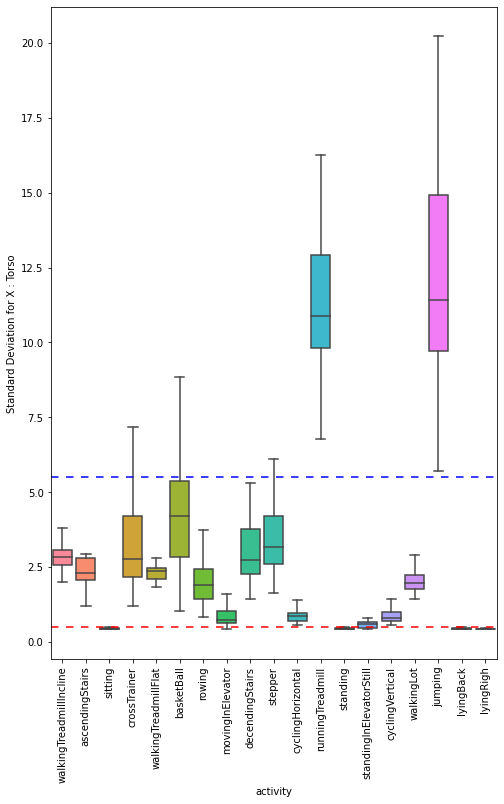

In [51]:
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,12))
sns.boxplot(x = features['activity'], y=features['T_xacc_std'],data=features, showfliers=False, saturation=1)
plt.axhline(y=0.5, dashes=(5,5), c='r')
plt.axhline(y=5.5, dashes=(5,5), c='b')
plt.ylabel('Standard Deviation for X : Torso')
plt.xticks(rotation=90)
plt.show()